In [52]:
import sys
import importlib
import gc
import glob
import random
from itertools import combinations

import numpy as np
import sklearn
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import pyemma
import msmtools
import mdtraj as md

import ivac
import extq

In [53]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [54]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots

In [55]:
cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# original data + previous supplemental sampling

In [4]:
# cv_trajs = list(np.load('../../data/raw_feat/cv_dist_spin_anton.npy', allow_pickle=True))
# cv_trajs.extend(np.load('../../data/raw_feat/cv_dist_spin_suppl_00.npy', allow_pickle=True))
# cv_trajs.extend(np.load('../../data/raw_feat/cv_dist_spin_suppl_01.npy', allow_pickle=True))

In [5]:
# # sb_labels = []
# for r in ('R217', 'R223', 'R226', 'R229', 'R232'):
#     for n in ('D129', 'D136', 'D151', 'D164', 'E183', 'D186'):
#         sb_labels.append(f'{r} - {n}')

In [6]:
# sb_trajs = list(np.load('../../data/raw_feat/feat2_raw_anton.npy', allow_pickle=True))
# for i in range(5):
#     sb_trajs.extend(np.load(f'../../data/raw_feat/feat2_suppl_{i:02d}.npy', allow_pickle=True))

In [7]:
# cv_arr = np.concatenate(cv_trajs)
# sb_arr = np.concatenate(sb_trajs)
# print(cv_arr.shape, sb_arr.shape)

(3603000, 2) (3603000, 60)


In [8]:
# traj_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)

In [6]:
cv_trajs = list(
    np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_00.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_01.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_02.npy", allow_pickle=True)
)

In [7]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [8]:
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
for i in range(6):
    sb_trajs.extend(
        np.load(f"../../data/raw_feat/feat2_suppl_{i:02d}.npy", allow_pickle=True)
    )

In [9]:
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(3729000, 2) (3729000, 60)


In [10]:
traj_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)

## Adaptive sampling data

In [12]:
# new_cvs = []
# cv_files = []
# nc_files = []
# xtc_files = []
# for i in range(1, 4):
#     for j in range(286, 300):
#         d = str(i).zfill(3)
#         new_cvs.append(np.loadtxt(f"../../suppl-runs/{j}/ds-{i}.txt")[:3000])
#         cv_files.append(f"../../suppl-runs/{j}/ds-{i}.txt")
#         nc_files.append(f"../../suppl-runs/{j}/civsd-{i}.nc")
#         xtc_files.append(f"../../suppl-runs/{j}/civsd_pro_{i}.xtc")

In [13]:
# for c in new_cvs:
#     print(len(c))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


In [16]:
# np.save("../../data/raw_feat/cv_dist_spin_suppl_02.npy", new_cvs)
# with open("../../data/suppl_cv_files.txt", mode='a') as f:
#     f.write("\n".join(cv_files))
# with open("../../data/suppl_traj_files.txt", mode='a') as f:
#     f.write("\n".join(nc_files))
# with open("../../data/suppl_xtc_files.txt", mode='a') as f:
#     f.write("\n".join(xtc_files))

## Load features 

In [17]:
# import pyemma

In [18]:
# feat = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
# pair_indices = np.loadtxt('../../data/feat3_atom_indices.txt', dtype=np.int32)
# feat.add_distances(pair_indices)
# print(feat.describe())

['DIST: ARG 217 CA 1768 - ASP 129 CA 406', 'DIST: ARG 217 CA 1768 - ASP 136 CA 530', 'DIST: ARG 217 CA 1768 - ASP 151 CA 751', 'DIST: ARG 217 CA 1768 - ASP 164 CA 944', 'DIST: ARG 217 CA 1768 - GLU 183 CA 1258', 'DIST: ARG 217 CA 1768 - ASP 186 CA 1299', 'DIST: ARG 223 CA 1872 - ASP 129 CA 406', 'DIST: ARG 223 CA 1872 - ASP 136 CA 530', 'DIST: ARG 223 CA 1872 - ASP 151 CA 751', 'DIST: ARG 223 CA 1872 - ASP 164 CA 944', 'DIST: ARG 223 CA 1872 - GLU 183 CA 1258', 'DIST: ARG 223 CA 1872 - ASP 186 CA 1299', 'DIST: ARG 226 CA 1934 - ASP 129 CA 406', 'DIST: ARG 226 CA 1934 - ASP 136 CA 530', 'DIST: ARG 226 CA 1934 - ASP 151 CA 751', 'DIST: ARG 226 CA 1934 - ASP 164 CA 944', 'DIST: ARG 226 CA 1934 - GLU 183 CA 1258', 'DIST: ARG 226 CA 1934 - ASP 186 CA 1299', 'DIST: ARG 229 CA 1990 - ASP 129 CA 406', 'DIST: ARG 229 CA 1990 - ASP 136 CA 530', 'DIST: ARG 229 CA 1990 - ASP 151 CA 751', 'DIST: ARG 229 CA 1990 - ASP 164 CA 944', 'DIST: ARG 229 CA 1990 - GLU 183 CA 1258', 'DIST: ARG 229 CA 1990 - A

In [5]:
# suppl_sbs = pyemma.coordinates.load(xtc_files, features=feat, chunksize=32)
# np.save("../../data/raw_feat/feat2_suppl_05", suppl_sbs)

# Plot new sampling data

In [11]:
import random

random.seed(123)

In [15]:
new_cvs = cv_trajs[236:]

In [16]:
len(new_cvs)

244

In [50]:
sns.set_context("talk")

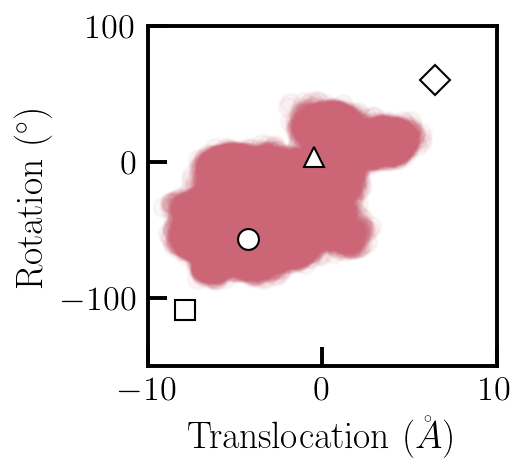

In [51]:
new_cv_arr = np.concatenate(new_cvs)
f = plt.figure()
ax = f.add_subplot(111)

N = len(new_cv_arr)
skip = 5
inds = random.sample(range(N), N // skip)
ax.scatter(new_cv_arr[inds, 0], new_cv_arr[inds, 1], alpha=0.05)
plotting.format_cvs(ax, centroids=True)
plt.savefig("../../fig/pmfs/dens_anton_amber_ds_scatter.png", dpi=300)

In [25]:
# cv_arr = np.vstack((cv_arr, new_cv_arr))

In [19]:
cv_arr.shape

(3729000, 2)

findfont: Font family ['"Computer Modern Sans Serif"'] not found. Falling back to DejaVu Sans.


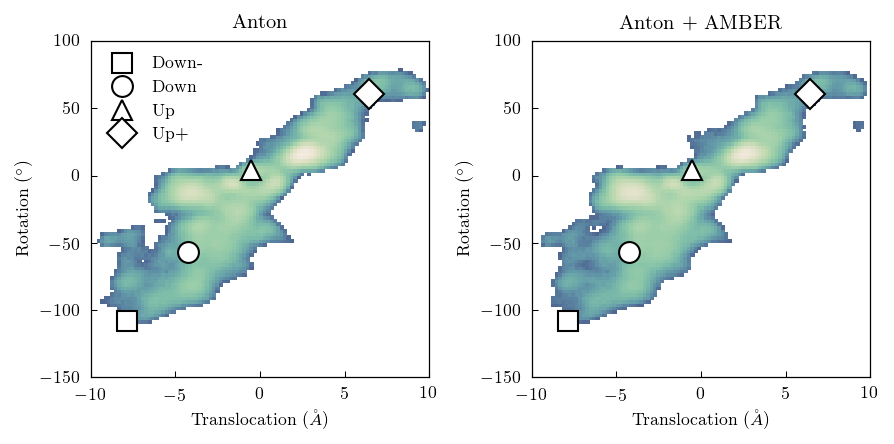

In [46]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3))

e = 3_000_000
norm = mpl.colors.LogNorm(vmin=1e-4, vmax=2e-2)
_, _, _, h0 = ax0.hist2d(
    cv_arr[:e, 0],
    cv_arr[:e, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap=cm_seq,
    norm=norm,
)
_, _, _, h1 = ax1.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap=cm_seq,
    norm=norm,
)
ax0.set_title("Anton")
ax1.set_title("Anton + AMBER")
# cb = f.colorbar(h0, ax=ax0)
# cb.ax.set_yticklabels("")
# cb1 = f.colorbar(h1, ax=ax1)
# cb1.ax.set_yticklabels("")
plotting.format_cvs(ax0, centroids=True)
plotting.format_cvs(ax1, centroids=True)
ax0.legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()
plt.savefig("../../fig/pmfs/dens_anton_amber_ds", dpi=300)

In [28]:
suppl_sb_arr = np.concatenate(suppl_sbs)

In [29]:
sb_arr = np.vstack((sb_arr, suppl_sb_arr))

In [30]:
sb_arr.shape

(3729000, 60)

In [47]:
from itertools import combinations

In [48]:
sb_ids = [42, 48, 47, 53]

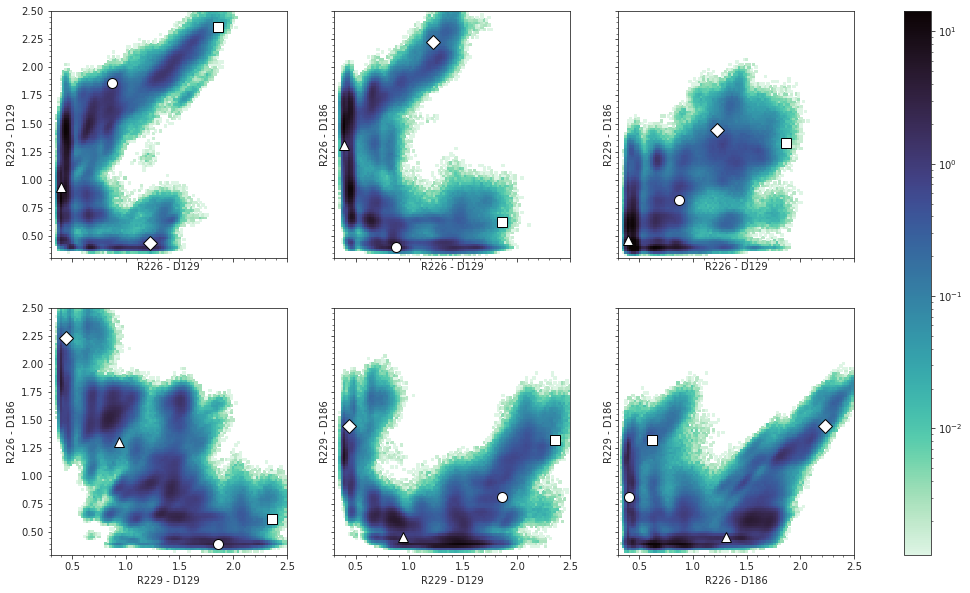

In [35]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:, sb1],
        sb_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

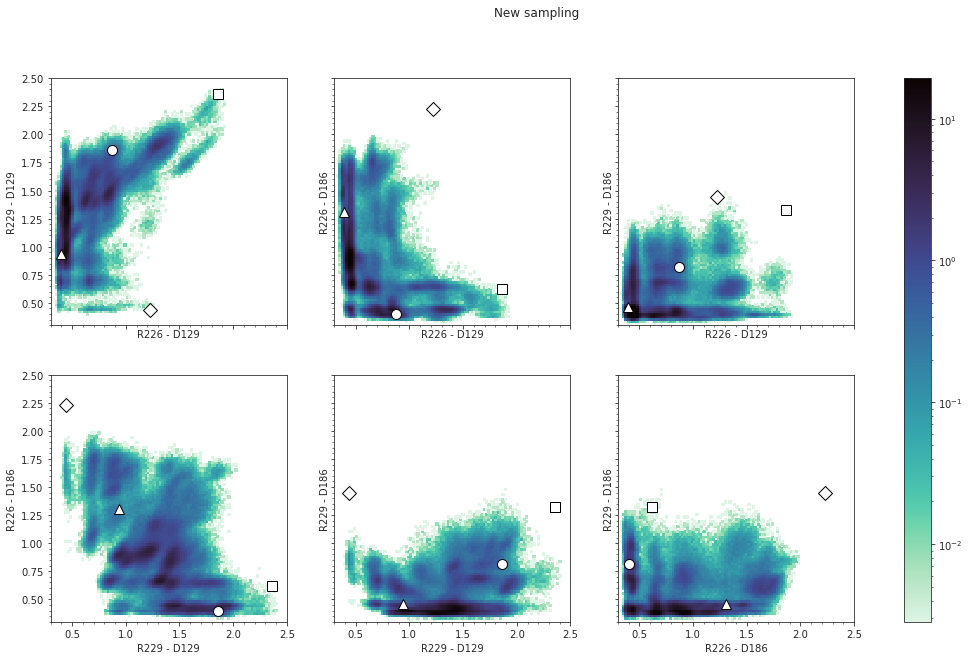

In [36]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[e:, sb1],
        sb_arr[e:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())
f.suptitle("New sampling")
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)